# Generación del modelo de datos

## Descomentar para probar

Este primer paso se debe descomentar para poder probar el cuaderno de forma individual, es decir, para probarlo; de lo contrario, se debe mantener comentado para evitar posibles fallos por reprocesar los ficheros.

**NOTA**: _Tener mucho cuidado de no crear un bucle de ejecución de los cuadernos_. Si se van a realizar pruebas sobre este cuaderno, comentar la linea correspondiente a este cuaderno en el cuaderno principal (**0_all_steps.jpnb**)

Esta es línea a buscar:
~~~ shell
%run /content/drive/My\ Drive/Proyecto03/Notebooks_Proyecto/4_data_model.ipynb
~~~

El inicio de este script es a partir del titulo **Modelos de datos**

~~~ python
# cargar datos
from google.colab import drive
drive.mount('/content/drive')
%run /content/drive/My\ Drive/Proyecto03/Notebooks_Proyecto/0_all_steps.ipynb
~~~

## Modelos de datos

In [ ]:
print('*******************************************************************************************************')
print(' Generando el modelo ....')

In [34]:
# crear el directorio para el modelo
! mkdir /content/model

### Bibliotecas

In [36]:
# Impotación de librerias para probar los modelos
import pandas as pd

# Decision tree
from sklearn.model_selection import train_test_split #ML library
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Visualization
import matplotlib.pyplot as plt

# Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

import numpy as np
import datetime
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

# generar el modelo
import joblib
import os

### Comprobar los datos

In [6]:
# Comprobamos que el fichero esta dsiponible
cardio_nuevo = pd.read_csv('/content/datasets/cardio_nuevo.csv', sep=',', index_col = 0)

In [7]:
# Revisamos si se ha cargado totalmente el dataset
cardio_nuevo.shape

(68199, 12)

In [8]:
#revisamos que columnas tenemos
cardio_nuevo.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [9]:
# Hacemos una descripción general de los datos
cardio_nuevo.describe(include='all')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68199.000000,68199.000000,68199.000000,68199.000000,68199.000000,68199.000000,68199.000000,68199.000000,68199.000000,68199.000000,68199.000000,68199.000000
mean,52.827959,1.349052,164.497515,74.151541,126.542955,81.303040,1.364360,1.225473,0.087934,0.053388,0.803560,0.494597
std,6.765134,0.476674,7.761566,14.190174,16.226555,9.332774,0.678924,0.571572,0.283201,0.224807,0.397308,0.499974
min,29.000000,1.000000,141.000000,41.000000,85.000000,45.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,198.000000,183.000000,197.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### DECISION TREE

#### Split train and test

In [10]:
# Extraemos la columna de la variable objetivo
cardio_target = cardio_nuevo.iloc[:,11]

In [11]:
# Excluimos la columna de la variable objetivo
cardio_features = cardio_nuevo.drop(labels='cardio', axis=1)

In [12]:
# Partir los datos entre datos para entrenar el modelo y datos para evaluar el modelo
x_train, x_test, y_train, y_test = train_test_split(cardio_features, cardio_target, test_size=0.3, random_state=1) 
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(47739, 11) (47739,)
(20460, 11) (20460,)


#### Entrenamiento

In [13]:
modelDT1 = DecisionTreeClassifier(max_depth=3) #valores por defecto
modelDT1 = modelDT1.fit(x_train, y_train)
modelDT1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

#### Visualización

<function matplotlib.pyplot.show>

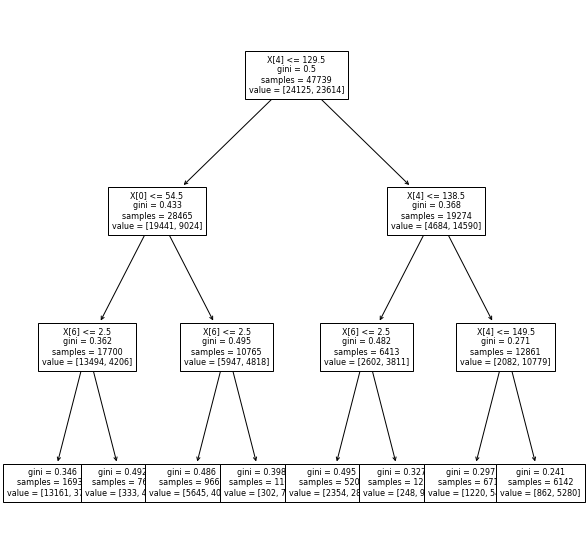

In [14]:
plt.figure(figsize=(10,10))
tree.plot_tree(modelDT1,fontsize=8) 
plt.show

In [15]:
modelDT1.feature_importances_

array([0.09773929, 0.        , 0.        , 0.        , 0.8230929 ,
       0.        , 0.0791678 , 0.        , 0.        , 0.        ,
       0.        ])

El algorítmo indica que las características más importantes son: Presión sistólica 82%; Edad 10% y Colesterol 8%.

### RANDOM FOREST

#### Split train and test

In [16]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(cardio_features, cardio_target, test_size = 0.3, random_state = 100)

In [17]:
# Create model
rfc = RandomForestClassifier()

In [18]:
dir(rfc)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_compute_oob_predictions',
 '_estimator_type',
 '_get_oob_predictions',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_oob_score_and_attributes',
 '_validate_X_predict',
 '_validate_data',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'de

#### PRIMER MODELO (Parámetros estándar)

In [19]:
# Random forest model creation
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [20]:
print(f"Accuray on test set:{round(rfc.score(X_test,y_test),2)}")
# round(accuracy_score(y_test1, y_pred1),2) you get the same value using this agorithm for accuracy

Accuray on test set:0.71


In [21]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))

=== Confusion Matrix ===
[[7371 3035]
 [2970 7084]]


In [22]:
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.71      0.71      0.71     10406
           1       0.70      0.70      0.70     10054

    accuracy                           0.71     20460
   macro avg       0.71      0.71      0.71     20460
weighted avg       0.71      0.71      0.71     20460



In [23]:
Basic_rfc_auc = roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1])
fpr_Basic_rfc, tpr_Basic_rfc, thresholds_Basic_rfc = roc_curve(y_test,rfc.predict_proba(X_test)[:,1])

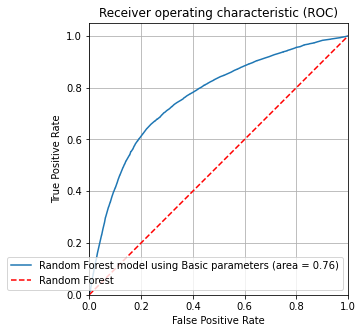

In [24]:
fig,ax = plt.subplots(figsize=(5,5))
ax.set_aspect("equal")
ax.plot(fpr_Basic_rfc, tpr_Basic_rfc,
         label=f'Random Forest model using Basic parameters (area = {round(Basic_rfc_auc,2)})')
plt.plot([0, 1], [0, 1],'r--', label="Random Forest")
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('images/RFC_BASICHPT')
plt.show()

#### Resultados primer modelo

| feature | value |
|:--|--:|
| Accuracy | 0.71 |
| AUC | 0.76 |
| Precision | 0.70 |
| Recall | 0.70  |
| F1 Score | 0.70 |

#### SEGUNDO MODELO (Parámetros modificados)

In [25]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.arange(2,10+1)] #linspace(10, 10, num = 11)]
# max_depth.append(None)
# Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1000, 2500, 5000]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [26]:
random_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap
               }

La siguiente operación tarda aproximadamente 8 minutos.

In [27]:
# tomamos la referncia de la hora
init = datetime.datetime.now()
print('Start in: '+str(init))

rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)
# Fit the random search model
# rf_random.fit(X_train[:5000],y_train[:5000])
rf_random.fit(X_train, y_train)

print('Execution time: ' + str(datetime.datetime.now()-init))
print('End in: ' + str(datetime.datetime.now()))

Start in: 2022-03-02 17:40:38.831423
Fitting 3 folds for each of 200 candidates, totalling 600 fits
Execution time: 0:10:00.009935
End in: 2022-03-02 17:50:38.842941


In [28]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=1000, n_estimators=20)

In [29]:
best_model = rf_random.best_estimator_

In [30]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, best_model.predict(X_test)))

=== Confusion Matrix ===
[[8158 2248]
 [3461 6593]]


In [31]:
print("=== Classification Report ===")
print(classification_report(y_test, best_model.predict(X_test)))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.70      0.78      0.74     10406
           1       0.75      0.66      0.70     10054

    accuracy                           0.72     20460
   macro avg       0.72      0.72      0.72     20460
weighted avg       0.72      0.72      0.72     20460



In [32]:
Basic_rfc_auc = roc_auc_score(y_test,best_model.predict(X_test))
fpr_Basic_rfc, tpr_Basic_rfc, thresholds_Basic_rfc = roc_curve(y_test,best_model.predict(X_test))

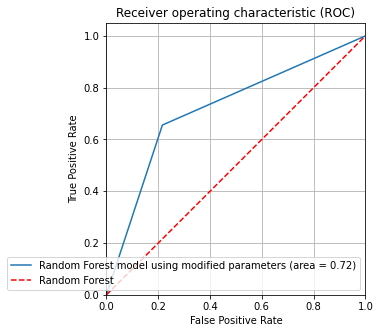

In [33]:
fig,ax = plt.subplots(figsize=(5,5))
ax.set_aspect("equal")
ax.plot(fpr_Basic_rfc, tpr_Basic_rfc,
         label=f'Random Forest model using modified parameters (area = {round(Basic_rfc_auc,2)})')
plt.plot([0, 1], [0, 1],'r--', label="Random Forest")
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('images/RFC_BASICHPT_2')
plt.show()

#### Resultados segundo modelo

| feature | value |
|:--|--:|
| Accuracy | 0.71 |
| AUC | 0.76 |
| Precision | 0.70 |
| Recall | 0.70  |
| F1 Score | 0.70 |

### Generar el modelo

In [39]:
# Asignar un nombre al fichero del modelo
savedir = '/content/model'
filename_model = os.path.join(savedir, 'model.joblib')

In [40]:
# guardar el modelo
joblib.dump(best_model, filename_model)

['/content/model/model.joblib']

In [41]:
print('Modelo generado!')
print('*******************************************************************************************************')

Modelo generado!
*******************************************************************************************************


#### Probar el modelo

In [42]:
# Datos de ejemplo
dataStreamlit = np.array([[60,1,151,67,120,80,2,2,0,0,0]])

In [43]:
model_input_df = pd.DataFrame(columns=cardio_nuevo.columns)
model_input_df=model_input_df.drop(columns=['cardio'])
model_input_df = pd.DataFrame(columns=model_input_df.columns, data=dataStreamlit)
model_input_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,60,1,151,67,120,80,2,2,0,0,0


In [44]:
# abrir el modelo y obtrener la estimación
final_model = joblib.load(filename_model)
estimated = round(float(final_model.predict(model_input_df)[0]), 3)
estimated

0.0